lotto 데이터는 1회부터 859회까지의 로또 당첨번호(보너스 번호를 제외한 6개의 추첨번호)를 담고 있는 데이터이며, 변수 설명은 다음과 같다.

In [7]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')


df = pd.read_csv('../data/lotto.csv')
df.head()

,time_id,num1,num2,num3,num4,num5,num6
0,859,8,22,35,38,39,41
1,858,9,13,32,38,39,43
2,857,6,10,16,28,34,38
3,856,10,24,40,41,43,44
4,855,8,15,17,19,43,44


1. 연관규칙분석을 수행하기 위해 lotto 데이터셋을 transaction 데이터로 변환하시오. (단, 본 분석에서 로또번호가 추첨된 순서는 고려하지 않고 분석을 수행하도록 한다.) 그리고 변환된 데이터에서 가장 많이 등장한 상위 10개의 로또번호를 막대그래프로 출력하고 이에 대해 설명하시오.

In [8]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = df.drop(['time_id'], axis=1).values
te_ary = te.fit_transform(te_ary)
te_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [9]:
# 다시 데이터프레임으로 변환
te_df = pd.DataFrame(te_ary, columns = te.columns_)
te_df

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
0,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,False,False,True,False,False
2,False,False,False,False,False,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,True,False,True,True,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,False,False,False
855,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
856,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
857,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False


45개의 열로 이루어진 트랜잭션 데이터 생성

In [10]:
te_df.count(True)

0      45
1      45
2      45
3      45
4      45
       ..
854    45
855    45
856    45
857    45
858    45
Length: 859, dtype: int64

In [11]:
from collections import Counter
true_df = pd.DataFrame(columns = ['num','Count'])
for i in te_df.columns:
    true_df = true_df.append({'num':i, 'Count': Counter(te_df[i])[True]}, ignore_index=True)
true_df.head()

,num,Count
0,1,122
1,2,112
2,3,111
3,4,115
4,5,119


<AxesSubplot:xlabel='num'>

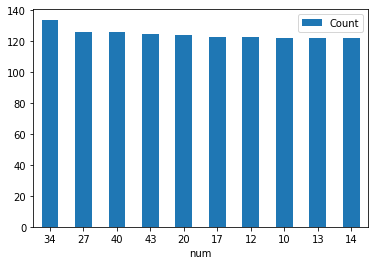

In [14]:
import matplotlib.pyplot as plt
top10 = true_df[:10].set_index('num')
top10.plot.bar( y='Count',rot=0)

가장 많이 등장한 상위 10개으 숫자는 34,40,27...이다.

2. 변환한 데이터에 대해 apriori 함수를 사용하여 다음 괄호 안의 조건을 반영하여 연관규칙을 생성하고, 이를 'rules_1' 이라는 변수에 저장하여 결과를 해석하시오. (최소 지지도 : 0.002, 최소 신뢰도 : 0.8, 최소조합 항목 수 : 2개, 최대조합 항목 수 : 6개) 그리고 도출된 연관규칙들을 향상도를 기준으로 내림차순 정렬하여 상위 30개의 규칙을 확인하고, 이를 데이터프레임으로 변환하여 csv파일로 출력하시오/.

In [15]:
from mlxtend.frequent_patterns import apriori

lotto_ap = apriori(te_df, min_support=0.002, max_len=6,use_colnames=True)
lotto_ap

,support,itemsets
0,0.142026,(1)
1,0.130384,(2)
2,0.129220,(3)
3,0.133877,(4)
4,0.138533,(5)
...,...,...
6358,0.002328,"(40, 43, 13, 14, 26)"
6359,0.002328,"(14, 15, 18, 21, 26)"
6360,0.002328,"(40, 14, 27, 30, 31)"
6361,0.002328,"(34, 44, 15, 19, 21)"


In [16]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(lotto_ap, metric='lift', min_threshold=0.8)

In [17]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1),(2),0.142026,0.130384,0.022119,0.155738,1.194453,0.003601,1.030030
1,(2),(1),0.130384,0.142026,0.022119,0.169643,1.194453,0.003601,1.033259
2,(1),(3),0.142026,0.129220,0.023283,0.163934,1.268646,0.004930,1.041521
3,(3),(1),0.129220,0.142026,0.023283,0.180180,1.268646,0.004930,1.046540
4,(1),(5),0.142026,0.138533,0.017462,0.122951,0.887519,-0.002213,0.982233
...,...,...,...,...,...,...,...,...,...
35741,(36),"(16, 26, 43, 31)",0.133877,0.002328,0.002328,0.017391,7.469565,0.002017,1.015330
35742,(43),"(16, 26, 36, 31)",0.145518,0.002328,0.002328,0.016000,6.872000,0.001989,1.013894
35743,(16),"(26, 43, 36, 31)",0.128056,0.002328,0.002328,0.018182,7.809091,0.002030,1.016147
35744,(26),"(16, 43, 36, 31)",0.135041,0.002328,0.002328,0.017241,7.405172,0.002014,1.015175


In [18]:
rules = rules[rules['confidence'] >= 0.8]
rules = rules[rules['antecedents'].map(lambda x: len(x)>2)]
rules.shape

(704, 9)

In [19]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28587,"(1, 3, 43)",(12),0.002328,0.143190,0.002328,1.0,6.983740,0.001995,inf
28601,"(1, 3, 15)",(25),0.002328,0.129220,0.002328,1.0,7.738739,0.002027,inf
28603,"(25, 3, 15)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf
28617,"(25, 3, 20)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf
28630,"(29, 3, 37)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf
...,...,...,...,...,...,...,...,...,...
35720,"(16, 26, 43, 31)",(36),0.002328,0.133877,0.002328,1.0,7.469565,0.002017,inf
35721,"(16, 43, 36)","(26, 31)",0.002328,0.015134,0.002328,1.0,66.076923,0.002293,inf
35724,"(16, 26, 36)","(43, 31)",0.002328,0.018626,0.002328,1.0,53.687500,0.002285,inf
35727,"(16, 26, 43)","(36, 31)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf


In [20]:
rules.sort_values('lift',ascending=False, inplace=True)
top30 = rules.head(30)
top30.to_csv('연관규칙.csv')

In [21]:
top30

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
35730,"(16, 26, 31)","(43, 36)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf
35484,"(24, 34, 22)","(31, 7)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf
35483,"(34, 31, 7)","(24, 22)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf
35636,"(26, 21, 14)","(18, 15)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf
35511,"(34, 10, 36)","(44, 22)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf
35490,"(24, 22, 31)","(34, 7)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf
35577,"(24, 20, 15)","(12, 30)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf
35727,"(16, 26, 43)","(36, 31)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf
35721,"(16, 43, 36)","(26, 31)",0.002328,0.015134,0.002328,1.0,66.076923,0.002293,inf
35515,"(34, 10, 22)","(36, 44)",0.002328,0.016298,0.002328,1.0,61.357143,0.002290,inf


3. 생성된 연관규칙 rules에 대한 정보를 해석하고, 1번 문제를 통해 확인했을 때 가장 많이 추첨된 번호가 우측항에 존재하는 규칙들만을 'rules_most_freq'라는 변수에 저장하시오. 그리고 해당 규칙들을 해석하여 인사이트를 도출한 뒤 서술하시오.

가장 많이 나온 번호 : 34

In [22]:
rules[rules['consequents'] == frozenset({34})].sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
34524,"(17, 42, 45)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf
34749,"(19, 44, 21)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf
35141,"(42, 45, 23)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf
30562,"(5, 29, 13)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf
31542,"(24, 31, 7)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf
35510,"(10, 36, 44, 22)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf
30660,"(17, 5, 29)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf
35480,"(24, 31, 22, 7)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf
33083,"(12, 37, 36)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf
34509,"(32, 17, 33)",(34),0.003492,0.155995,0.003492,1.0,6.410448,0.002948,inf
